<a href="https://colab.research.google.com/github/KenzaxTazi/Agri-Risk/blob/master/Model_exploration_Raghul_pre_damon_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tqdm==4.42.1


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import xarray as xr
import numpy as np

import os, sys

path = '/content/drive/My Drive/Team Plants/data'
os.chdir(path)


# Import full dataset # 

## Data processing and One-hot Encoding## 

In [0]:
features_to_select = ['lon',
'lat', #need to include lat for this pre-damon method
'maize_a_2005',
'CDD-Q1-2010',
'CDD-Q1-2005',
'CDD-Q3-2005',
'CFD-Q1-2010',
'CFD-Q4-2010',
'CFD-Q1-2005',
'CFD-Q2-2005',
'CFD-Q4-2005',
'CWD-Q2-2010',
'CWD-Q3-2010',
'CWD-Q4-2010',
'WW-Q1-2010',
'WSDI-Q3-2010',
'WSDI-Q4-2010',
'WSDI-Q2-2005',
'WSDI-Q3-2005',
'CSDI-Q1-2010',
'BEDD-06-2010',
'BEDD-10-2010',
'BEDD-04-2005',
'BEDD-06-2005',
'BEDD-08-2005',
'BEDD-09-2005',
'FD-12-2010',
'FD-02-2005',
'FD-03-2005',
'FD-05-2005',
'FD-09-2005',
'FD-11-2005',
'FD-12-2005',
'R20mm-10-2005',
'R10mm-05-2010',
'R10mm-09-2010',
'ID-03-2010',
'ID-04-2010',
'ID-11-2010',
'ID-01-2005',
'ID-02-2005',
'ID-03-2005',
'ID-04-2005',
'ID-11-2005',
'TG-03-2010',
'TG-05-2010',
'TG-07-2010',
'TG-10-2010',
'TG-12-2010',
'TG-04-2005',
'TG-05-2005',
'TG-06-2005',
'TG-07-2005',
'TG-09-2005',
'TG-12-2005',
'TN-05-2010',
'TN-06-2010',
'TN-07-2010',
'TN-09-2010',
'TN-10-2010',
'TN-05-2005',
'TN-06-2005',
'TN-09-2005',
'DTR-01-2010',
'DTR-02-2010',
'DTR-03-2010',
'DTR-07-2010',
'DTR-12-2010',
'DTR-08-2005',
'DTR-09-2005',
'DTR-11-2005',
'DTR-12-2005',
'RR1-01-2010',
'RR1-02-2010',
'RR1-03-2010',
'RR1-04-2010',
'RR1-05-2010',
'RR1-06-2010',
'RR1-09-2010',
'RR1-04-2005',
'RR1-07-2005',
'RR1-08-2005',
'RR1-09-2005',
'RR1-12-2005',
'RR-05-2010',
'RR-09-2010',
'RR-10-2010',
'RR-02-2005',
'RR-03-2005',
'RR-06-2005',
'RR-07-2005',
'RR-08-2005',
'RR-10-2005',
'RR-11-2005',
'SU-03-2010',
'SU-04-2010',
'SU-05-2010',
'SU-06-2010',
'SU-09-2010',
'SU-10-2010',
'SU-12-2010',
'SU-02-2005',
'SU-04-2005',
'SU-05-2005',
'SU-06-2005',
'SU-07-2005',
'SU-10-2005',
'SU-11-2005',
'SU-12-2005',
'TNn-05-2010',
'TNn-06-2010',
'TNn-07-2010',
'TNn-08-2010',
'TNn-09-2010',
'TNn-05-2005',
'TNn-12-2005',
'TR-06-2005',
'TR-10-2005',
'TR-12-2005',
'TX-01-2010',
'TX-02-2010',
'TX-04-2010',
'TX-08-2010',
'TX-10-2010',
'TX-02-2005',
'TX-06-2005',
'TX-07-2005',
'TX-08-2005',
'TX-09-2005',
'TX-11-2005',
'TXn-01-2010',
'TXn-02-2010',
'TXn-04-2010',
'TXn-06-2010',
'TXn-10-2010',
'TXn-12-2010',
'TXn-01-2005',
'TXn-03-2005',
'TXn-06-2005',
'TXn-09-2005',
'TXx-02-2010',
'TXx-04-2010',
'TXx-10-2010',
'TXx-11-2010',
'TXx-03-2005',
'TXx-04-2005',
'TXx-05-2005',
'TXx-06-2005',
'TXx-09-2005',
'TXx-10-2005']

In [0]:
non_climatic_features = ["soil_types",
                         "climate_zones",
                         "elevation",
                         "slope",
                         "irrigation"
                         ]

target = ["maize_a_2010"]

In [0]:
feature_slice = features_to_select + non_climatic_features + target

In [0]:
categorical_variables = ["climate_zones",
                         "soil_types"
                                              ]

In [0]:
dataset = pd.read_csv("climate_monthly_seasonal_2005_2010_with_spatial_attributes_filtered.csv") #replace this with the file you want to use
#you should import the csv which is already processed (nans removed) and with only the columns we want but not one-hot encoded

from sklearn.model_selection import train_test_split
from tqdm import tqdm
tqdm.pandas()
import xarray as xr
import random

dataset = dataset[feature_slice]

dataset = dataset[abs(dataset['maize_a_2010'] - dataset['maize_a_2005']) / dataset['maize_a_2005'] < 1] # select yields based on 100% threshold 


random_seed = 42

target = 'maize_a_2010'

### One-hot encoded data ###

In [0]:
def one_hot(df, columns):
    '''
    one hot encode columns and concat to original df
    ----------
    Parameters: 
    df (pandas dataframe)
    columns (list of strings): columns to one hot encode
    
    -------
    Return:
     One pandas dataframe with the one hot encoded columns 
    
    '''
    return pd.concat((df, pd.get_dummies(df[columns])), axis=1)

In [0]:
def format_col_to_str(df, cols):
    '''
    Convert multiple columns to str format
    ---------------------
    Parameters:
    df (pandas DataFrame)
    cols (list of strings): cols to convert
    '''
    
    return df[cols].astype(str)

In [0]:
dataset_1 = dataset.copy()

dataset_1[categorical_variables] = format_col_to_str(dataset_1, categorical_variables)
dataset_1 = one_hot(dataset_1, columns=categorical_variables)
dataset_1.drop(categorical_variables, axis=1,inplace=True)


X = dataset_1.drop(target,axis=1)

y = dataset_1[[target]]

train_set_x, test_set_x, train_set_y, test_set_y = train_test_split(X, y, test_size=0.3, random_state=random_seed, shuffle=True)

# Model exploration # 

## Which models can at least fit the training data? ##

They need to at least get a high R2 on the training set in order to have a chance at the test set (after sufficient regularisation).

### Random Forests ###


In [0]:
%%time 

from sklearn.ensemble import RandomForestRegressor

rnd_reg = RandomForestRegressor(n_estimators=15, n_jobs=-1, verbose=3)
rnd_reg.fit(train_set_x,train_set_y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 15building tree 2 of 15building tree 3 of 15building tree 4 of 15



building tree 5 of 15
building tree 6 of 15
building tree 7 of 15
building tree 8 of 15
building tree 9 of 15
building tree 10 of 15
building tree 11 of 15
building tree 12 of 15
building tree 13 of 15
building tree 14 of 15
building tree 15 of 15


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  7.2min finished


CPU times: user 26min 46s, sys: 478 ms, total: 26min 47s
Wall time: 7min 14s


In [0]:
rnd_reg.score(train_set_x,train_set_y)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    1.0s finished


0.9924742079280336

In [0]:
rnd_reg.score(test_set_x,test_set_y)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    0.5s finished


0.9564778689335509

### Extra trees ###


In [0]:
%%time 

from sklearn.ensemble import ExtraTreesRegressor

extra_trees = ExtraTreesRegressor(n_jobs=-1, verbose=3, n_estimators=10)
extra_trees = extra_trees.fit(train_set_x, train_set_y)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  1.2min remaining:   31.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.6min finished


CPU times: user 5min 31s, sys: 97.3 ms, total: 5min 31s
Wall time: 1min 36s


In [0]:
extra_trees.score(train_set_x,train_set_y)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.7s remaining:    0.3s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.9s finished


1.0

In [0]:
extra_trees.score(test_set_x,test_set_y)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.4s finished


0.959570610665564

### Extreme Boosting ###

In [0]:
!pip3 install xgboost

In [0]:
import xgboost as xgb


In [0]:
xgbmodel = xgb.XGBRegressor(n_jobs=-1, verboxity=2, random_state=42, n_estimators=100, objective="reg:squarederror", max_depth=20)

In [0]:
xgbmodel.fit(train_set_x,train_set_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=20, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1, verboxity=2)

In [0]:
xgbmodel.score(train_set_y, xgbmodel.predict(train_set_x))

0.9975928970862603

All three models have capacity to fit the data.

## Hyperparameter tuning: search of parameter space ## 

### Random Forest ### 

In [0]:
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

Example hyperparameter random search


In [0]:
parameter_grid = {

  'n_estimators': sp_randint(8,40),
  'max_depth':  sp_randint(800,10000),
  'min_samples_split': uniform(0.0001,0.8)

}

In [0]:
rnd_search = RandomForestRegressor()
random_search_rf = RandomizedSearchCV(rnd_search, parameter_grid, cv=5, n_jobs=-1, random_state=42, verbose=10)

random_search_rf.fit(train_set_x,train_set_y)
result = pd.concat([pd.DataFrame(random_search_rf.cv_results_["params"]),pd.DataFrame(random_search_rf.cv_results_["mean_test_score"], columns=["Score"])],axis=1)
result.sort_values(by="Score", ascending=False, inplace=True)

Selection of best RF model

In [0]:
rf = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9734, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      n_estimators=48, n_jobs=None, oob_score=False,
                      random_state=None, verbose=3, warm_start=False)

In [0]:
%%time

rf.fit(train_set_x, train_set_y)

Final RF has score of R2=0.958

In [0]:
rf.score(test_set_x_prepared, test_set_y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    4.4s finished


0.958166398421789

### Extra Trees ###

In [0]:
from sklearn.ensemble import ExtraTreesRegressor
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

Example hyperparameter search

In [0]:
parameter_grid = {

  'n_estimators': sp_randint(1,50),
  'max_depth':  sp_randint(1,40),
  'min_samples_split': uniform(0.01,0.199)

}

In [0]:
extra_trees_search = ExtraTreesRegressor()
random_search = RandomizedSearchCV(extra_trees_search, parameter_grid, cv=5, n_jobs=-1, random_state=42)
random_search.fit(train_set_x,train_set_y)

result = pd.concat([pd.DataFrame(random_search.cv_results_["params"]),pd.DataFrame(random_search.cv_results_["mean_test_score"], columns=["Score"])],axis=1)
result.sort_values(by="Score", ascending=False, inplace=True)
result

Selecting final extra trees model


In [0]:
extra_trees_final = ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=10, n_jobs=-1, oob_score=False,
                    random_state=None, verbose=3, warm_start=False)

In [0]:
%%time
extra_trees_final.fit(train_set_x, train_set_y)

In [0]:
extra_trees_final.score(test_set_x, test_set_y)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.4s finished


0.9598494134785569

Final extra trees score is 0.960

### Extreme Boosting ###

In [0]:
!pip3 install xgboost


In [0]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
import xgboost as xgb


Example random search over hyperparameters

In [0]:
parameter_grid4 = {

  'min_child_weight': sp_randint(15,17),
  'max_depth':  sp_randint(13,16),
  'gamma': uniform(1.260,0.001),
  'subsample': uniform(0.86, 0.02),
 'colsample_bytree': uniform(0.71,0.08),
  'n_estimators': sp_randint(225,240)

}

xgb_model4 = xgb.XGBRegressor(tree_method='gpu_hist', objective="reg:squarederror") #tree method gpu_hist allows gpu usage

random_search_xgb4 = RandomizedSearchCV(xgb_model4, parameter_grid4, cv=5, random_state=42, verbose=10, error_score='raise', n_iter=5)

random_search_xgb4.fit(train_set_x,train_set_y)

result = pd.concat([pd.DataFrame(random_search_xgb4.cv_results_["params"]),pd.DataFrame(random_search_xgb4.cv_results_["mean_test_score"], columns=["Score"])],axis=1)
result.sort_values(by="Score", ascending=False, inplace=True)
result

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] colsample_bytree=0.7399632095077889, gamma=1.2609507143064098, max_depth=15, min_child_weight=16, n_estimators=237, subsample=0.8719370031589297 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  colsample_bytree=0.7399632095077889, gamma=1.2609507143064098, max_depth=15, min_child_weight=16, n_estimators=237, subsample=0.8719370031589297, score=0.959, total=  26.7s
[CV] colsample_bytree=0.7399632095077889, gamma=1.2609507143064098, max_depth=15, min_child_weight=16, n_estimators=237, subsample=0.8719370031589297 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   26.7s remaining:    0.0s


[CV]  colsample_bytree=0.7399632095077889, gamma=1.2609507143064098, max_depth=15, min_child_weight=16, n_estimators=237, subsample=0.8719370031589297, score=0.958, total=  26.7s
[CV] colsample_bytree=0.7399632095077889, gamma=1.2609507143064098, max_depth=15, min_child_weight=16, n_estimators=237, subsample=0.8719370031589297 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   53.5s remaining:    0.0s


[CV]  colsample_bytree=0.7399632095077889, gamma=1.2609507143064098, max_depth=15, min_child_weight=16, n_estimators=237, subsample=0.8719370031589297, score=0.959, total=  26.2s
[CV] colsample_bytree=0.7456666202282872, gamma=1.260099974915818, max_depth=15, min_child_weight=16, n_estimators=229, subsample=0.8720223002348642 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.3min remaining:    0.0s


[CV]  colsample_bytree=0.7456666202282872, gamma=1.260099974915818, max_depth=15, min_child_weight=16, n_estimators=229, subsample=0.8720223002348642, score=0.959, total=  26.2s
[CV] colsample_bytree=0.7456666202282872, gamma=1.260099974915818, max_depth=15, min_child_weight=16, n_estimators=229, subsample=0.8720223002348642 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.8min remaining:    0.0s


[CV]  colsample_bytree=0.7456666202282872, gamma=1.260099974915818, max_depth=15, min_child_weight=16, n_estimators=229, subsample=0.8720223002348642, score=0.957, total=  25.9s
[CV] colsample_bytree=0.7456666202282872, gamma=1.260099974915818, max_depth=15, min_child_weight=16, n_estimators=229, subsample=0.8720223002348642 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.2min remaining:    0.0s


[CV]  colsample_bytree=0.7456666202282872, gamma=1.260099974915818, max_depth=15, min_child_weight=16, n_estimators=229, subsample=0.8720223002348642, score=0.959, total=  25.8s
[CV] colsample_bytree=0.7666458062236836, gamma=1.2600205844942958, max_depth=14, min_child_weight=16, n_estimators=236, subsample=0.878771054180315 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  2.6min remaining:    0.0s


[CV]  colsample_bytree=0.7666458062236836, gamma=1.2600205844942958, max_depth=14, min_child_weight=16, n_estimators=236, subsample=0.878771054180315, score=0.959, total=  22.8s
[CV] colsample_bytree=0.7666458062236836, gamma=1.2600205844942958, max_depth=14, min_child_weight=16, n_estimators=236, subsample=0.878771054180315 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  3.0min remaining:    0.0s


[CV]  colsample_bytree=0.7666458062236836, gamma=1.2600205844942958, max_depth=14, min_child_weight=16, n_estimators=236, subsample=0.878771054180315, score=0.957, total=  22.6s
[CV] colsample_bytree=0.7666458062236836, gamma=1.2600205844942958, max_depth=14, min_child_weight=16, n_estimators=236, subsample=0.878771054180315 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  3.4min remaining:    0.0s


[CV]  colsample_bytree=0.7666458062236836, gamma=1.2600205844942958, max_depth=14, min_child_weight=16, n_estimators=236, subsample=0.878771054180315, score=0.959, total=  22.6s
[CV] colsample_bytree=0.7100623012672811, gamma=1.2609922115592913, max_depth=13, min_child_weight=16, n_estimators=234, subsample=0.8704951286326448 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  3.8min remaining:    0.0s


[CV]  colsample_bytree=0.7100623012672811, gamma=1.2609922115592913, max_depth=13, min_child_weight=16, n_estimators=234, subsample=0.8704951286326448, score=0.958, total=  19.0s
[CV] colsample_bytree=0.7100623012672811, gamma=1.2609922115592913, max_depth=13, min_child_weight=16, n_estimators=234, subsample=0.8704951286326448 
[CV]  colsample_bytree=0.7100623012672811, gamma=1.2609922115592913, max_depth=13, min_child_weight=16, n_estimators=234, subsample=0.8704951286326448, score=0.957, total=  18.9s
[CV] colsample_bytree=0.7100623012672811, gamma=1.2609922115592913, max_depth=13, min_child_weight=16, n_estimators=234, subsample=0.8704951286326448 
[CV]  colsample_bytree=0.7100623012672811, gamma=1.2609922115592913, max_depth=13, min_child_weight=16, n_estimators=234, subsample=0.8704951286326448, score=0.959, total=  18.8s
[CV] colsample_bytree=0.7445556014913692, gamma=1.260291229140198, max_depth=15, min_child_weight=15, n_estimators=234, subsample=0.8609333132642722 
[CV]  colsa

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  6.0min finished


,colsample_bytree,gamma,max_depth,min_child_weight,n_estimators,subsample,Score
1,0.745667,1.260100,15,16,229,0.872022,0.958369
2,0.766646,1.260021,14,16,236,0.878771,0.958349
0,0.739963,1.260951,15,16,237,0.871937,0.958315
4,0.744556,1.260291,15,15,234,0.860933,0.958272
3,0.710062,1.260992,13,16,234,0.870495,0.957775


Final model


In [0]:
xgb_model_final = xgb.XGBRegressor(tree_method='gpu_hist', objective="reg:squarederror",
                                   colsample_bytree=0.745667, gamma=1.260100, max_depth=15,
                                   min_child_weight=16, n_estimators=229, subsample=0.872022,
                                   verbosity=3, random_state=42, seed=42)


In [0]:
xgb_model_final.fit(train_set_x,train_set_y)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.745667, gamma=1.2601,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=15, min_child_weight=16, missing=None, n_estimators=229,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.872022, tree_method='gpu_hist',
             verbosity=3)

In [0]:
xgb_model_final.score(test_set_x, test_set_y)

0.9627299228249108

Final XGBoost test score is 0.962


In [0]:
xgb_model_final.save_model('final_model_seeded.json')



In [0]:
#here i use a cpu implementation. specify hist method and n_jobs=-1

xgb_model_final_cpu = xgb.XGBRegressor(tree_method='hist', objective="reg:squarederror",
                                   colsample_bytree=0.745667, gamma=1.260100, max_depth=15,
                                   min_child_weight=16, n_estimators=229, subsample=0.872022,
                                   verbosity=3, random_state=42, seed=42, n_jobs=-1)

In [0]:
xgb_model_final_cpu.fit(train_set_x_prepared,train_set_y)


In [0]:
xgb_model_final_cpu.score(test_set_x_prepared, test_set_y)

0.9625006208900734

#Plots#

## Plot of prediction vs actual ##

In [0]:
# xgb final model

In [0]:
import joblib
xgb_model = joblib.load('final_model_cpu.pkl')  #choose the appropriate model
from sklearn.metrics import r2_score

In [0]:
r2 = round(xgb_model.score(test_set_x,test_set_y),2)

In [0]:
#plot a graph

import matplotlib.pyplot as plt
import string

In [0]:
test_x_predict = xgb_model.predict(test_set_x)

In [0]:
max_x = test_set_y['maize_a_2010'].max()
max_y = max(test_x_predict)

max_axis = max(max_x, max_y) + 1000 #adds a bit to the max axis so that we can see the max point easily

min_x = test_set_y['maize_a_2010'].min()
min_y = min(test_x_predict)

min_axis = min(min_x, min_y) -1000

In [0]:
#equation of line for prediction vs real values

from sklearn.linear_model import LinearRegression as lin_reg

model = lin_reg(fit_intercept=True)

model.fit(test_set_y,test_x_predict)

intercept = model.intercept_
gradient = model.coef_

intercept_round = int(round(intercept,0))
gradient_round = round(gradient[0],2)

In [0]:
#residuals

residual = test_x_predict-test_set_y.to_numpy().reshape(1,-1)

max_residual = residual.max()
min_residual = residual.min()

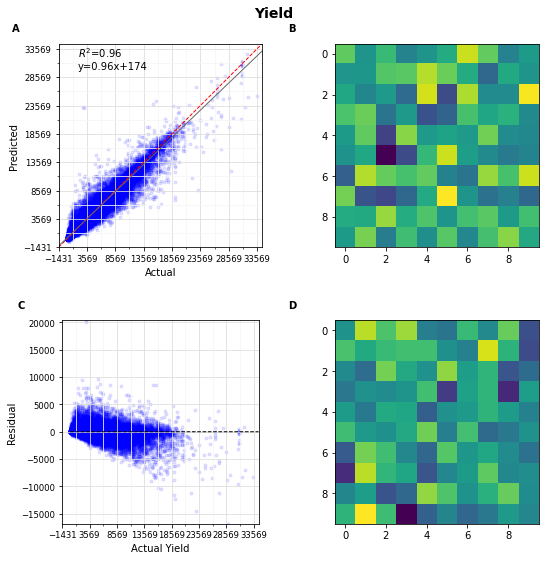

In [0]:
plt.style.use('seaborn-pastel')

fig, ax = plt.subplots(2,2, figsize=(8,8))

major_ticks = np.arange(min_axis, max_axis, 5000)
minor_ticks = np.arange(min_axis, max_axis, 2500)


ax[0,0].scatter(x=test_set_y, y=test_x_predict, alpha=0.1, c='b', marker=".")
ax[0,0].set_xlim([0,max_axis])
ax[0,0].set_xticks(major_ticks)
ax[0,0].set_xticks(minor_ticks, minor=True)


ax[0,0].set_ylim([0,max_axis])
ax[0,0].set_yticks(major_ticks)
ax[0,0].set_yticks(minor_ticks, minor=True)

ax[0,0].grid(which='minor', color='whitesmoke')
ax[0,0].grid(which='major', color='gainsboro')
ax[0,0].set_axisbelow

ax[0,0].tick_params(labelsize=8.5)


ax[0,0].set_aspect('equal', 'box')

ax[0,0].plot(np.arange(min_axis,max_axis,10),np.arange(min_axis,max_axis,10),linewidth=1, linestyle='dashed', c='r') #1:1 line

#specify linear regression line (line through predictions vs truth)

x = np.arange(min_axis,max_axis,10)
y = gradient*x + intercept
ax[0,0].plot(x,y,linewidth=1, c='dimgrey') 


ax[0,0].set(xlabel= 'Actual', ylabel = 'Predicted')
ax[0,0].text(x=2000, y=30000, s=f'$R^2$={r2}\ny={gradient_round}x+{intercept_round}', ma = 'left', size=10)

####################################################################
##Plot for Residuals##

#major_ticks_2 = np.arange(0, max_axis, 4000)
#minor_ticks_2 = np.arange(0, max_axis, 2000)


ax[1,0].scatter(x=test_x_predict, y=residual, alpha=0.1, c='b', marker=".")
ax[1,0].set_xlim([0,max_axis])
ax[1,0].set_xticks(major_ticks)
ax[1,0].set_xticks(minor_ticks, minor=True)


ax[1,0].set_ylim([min_residual,max_residual])
#ax[1,0].set_yticks(major_ticks)
#ax[1,0].set_yticks(minor_ticks, minor=True)

ax[1,0].grid(which='minor', color='whitesmoke')
ax[1,0].grid(which='major', color='gainsboro')
ax[1,0].set_axisbelow

ax[1,0].tick_params(labelsize=8.5)

#plot y=0 line
ax[1,0].plot(np.arange(0,max_axis,10),np.linspace(0,0,len(np.arange(0,max_axis,10))),linewidth=1, linestyle='dashed', c='k') 



ax[1,0].set(xlabel= 'Actual Yield', ylabel = 'Residual')

###########################################################################

plt.suptitle('Yield', fontsize=14, fontweight='bold', x=0.5, y=0.99)


ax = ax.flat

for n, axis in enumerate(ax):

    axis.imshow(np.random.randn(10,10), interpolation='none')    
    axis.text(-0.23, 1.06, string.ascii_uppercase[n], transform=axis.transAxes, 
            size=10, weight='bold')
    
fig.tight_layout(pad=2.3)


########

plt.show()

#put units